In [617]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset (adult.data)

In [618]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
census_df = pd.read_csv(url, names=columns, sep=',\s+')

In [619]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [620]:
census_df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


The dataset contains no null values. However, there are a few '?' values, in "workclass","occupation", "native-country", that can be fixed.

In [621]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [622]:
attrib, counts = np.unique(census_df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['workclass'][census_df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(census_df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['occupation'][census_df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(census_df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['native-country'][census_df['native-country'] == '?'] = most_freq_attrib 

The missing values are assigned the most frequent attribute respectively using mode.

In [623]:
census_df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='income'>

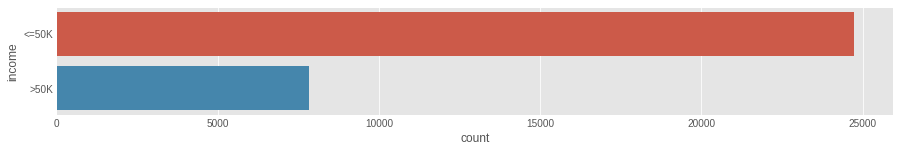

In [624]:
plt.figure(figsize=(15,2))
plt.style.use('ggplot')
sns.countplot(y="income", data=census_df)

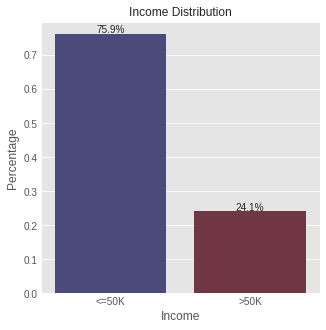

In [625]:
plt.figure(figsize=(5,5))
plt.title('Income Distribution', fontsize=12)
income_perc = census_df['income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

perc = sns.barplot(x = 'Income', y = 'Percentage', data = income_perc.head(2), palette='icefire')
for p in perc.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    perc.annotate(f'{height:.1%}', (x + width/2, y + height*1.01), ha='center')

In [626]:
income_perc

,Income,Percentage
0,<=50K,0.75919
1,>50K,0.24081


Income level less than 50K is more than 3 times of those over 50K, showing that the the dataset is slightly biased.

In [627]:
def AgeGroup(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "70+"

census_df['AgeGroup'] = census_df['age'].apply(AgeGroup)
  

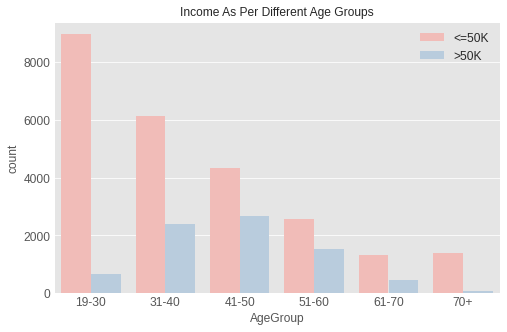

In [628]:
plt.figure(figsize=(8,5))
age_ol = ['19-30', '31-40', '41-50', '51-60', '61-70', '70+']
sns.countplot(census_df['AgeGroup'], hue = census_df['income'], palette='Pastel1', order = age_ol)
plt.title('Income As Per Different Age Groups', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

Up until a certain point, we see that the proportion of those earning more than $50,000 grows with age.

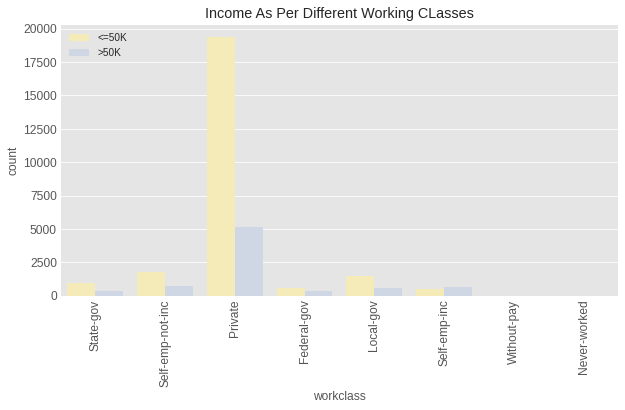

In [629]:
plt.figure(figsize=(10,5))
plt.title('Income As Per Different Working CLasses')
sns.countplot(census_df['workclass'], hue = census_df['income'], palette = 'Pastel2_r')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

Only in the self-employed group do persons making more than $50,000 per year outnumber those making less. It can be helpful to imply that managing your own successful business may increase your chances of earning more money.

In [630]:
census_df['education'].replace('Preschool', 'HS',inplace=True)
census_df['education'].replace('10th', 'HS',inplace=True)
census_df['education'].replace('11th', 'HS',inplace=True)
census_df['education'].replace('12th', 'HS',inplace=True)
census_df['education'].replace('1st-4th', 'HS',inplace=True)
census_df['education'].replace('5th-6th', 'HS',inplace=True)
census_df['education'].replace('7th-8th', 'HS',inplace=True)
census_df['education'].replace('9th', 'HS',inplace=True)

In [631]:
census_df[['education', 'education-num']].groupby(['education'],as_index=False).mean().sort_values(by='education-num')

,education,education-num
4,HS,5.602398
5,HS-grad,9.000000
8,Some-college,10.000000
1,Assoc-voc,11.000000
0,Assoc-acdm,12.000000
2,Bachelors,13.000000
6,Masters,14.000000
7,Prof-school,15.000000
3,Doctorate,16.000000


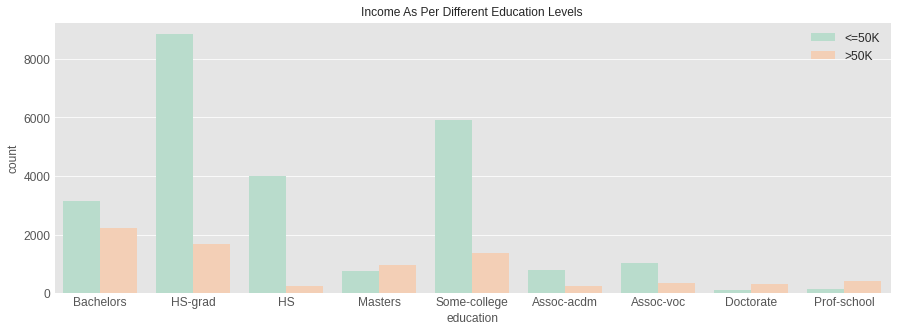

In [632]:
plt.figure(figsize=(15,5))
sns.countplot(census_df['education'], hue = census_df['income'], palette='Pastel2')
plt.title('Income As Per Different Education Levels', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

There are more persons making more than $50,000 per year than those earning less than it in the area of education levels for those with a bachelor's, master's, doctorate, or professional degree.

In [633]:
census_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
census_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
census_df['marital-status'].replace(['Married-spouse-absent'], 'Married',inplace=True)

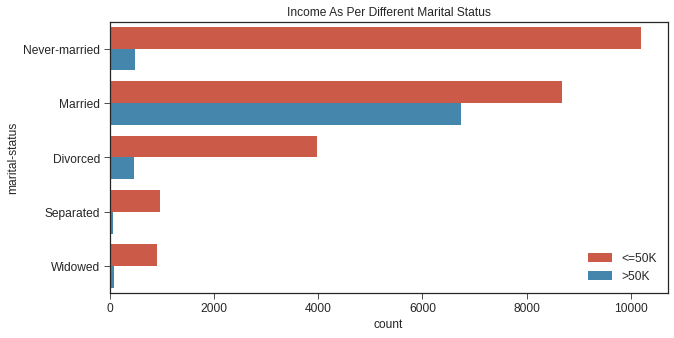

In [634]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-ticks')
sns.countplot(y='marital-status', hue = 'income', data = census_df)
plt.title('Income As Per Different Marital Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

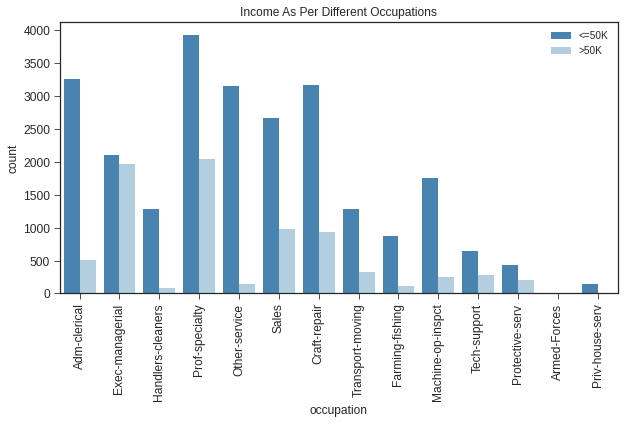

In [635]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['occupation'], hue = census_df['income'], palette='Blues_r')
plt.title('Income As Per Different Occupations', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)


People in executive management positions are equally likely to make more than $50,000 annually.

An adult in a prof-specialty has a about 33% chance of making more over $50,000 each year.

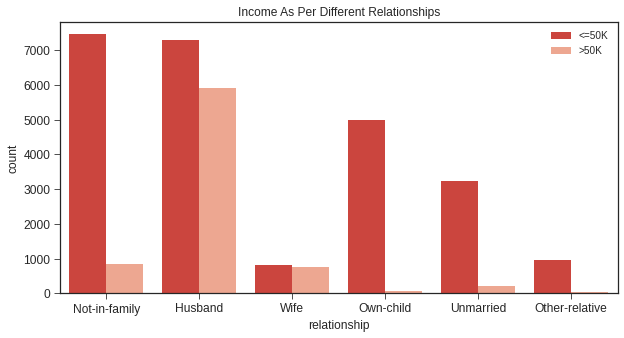

In [636]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['relationship'], hue = census_df['income'], palette='Reds_r')
plt.title('Income As Per Different Relationships', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

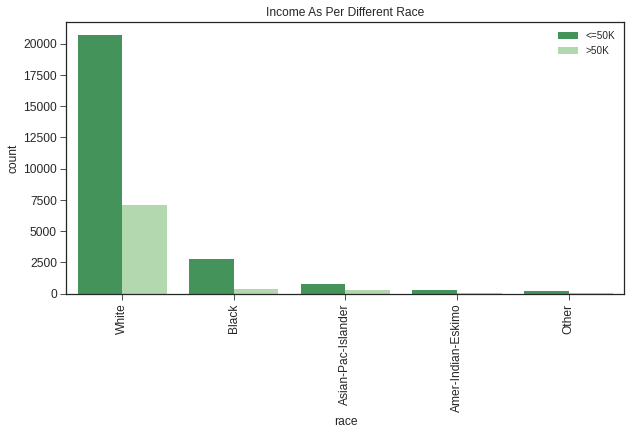

In [637]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['race'], hue = census_df['income'], palette='Greens_r')
plt.title('Income As Per Different Race', fontsize=12)  #except Whites there are very few people of different races
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

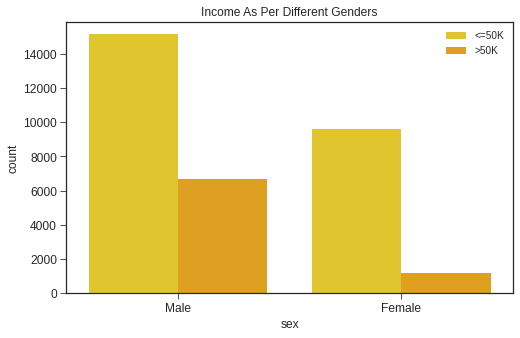

In [638]:
plt.figure(figsize=(8,5))
sns.countplot(census_df['sex'], hue = census_df['income'], palette='Wistia')
plt.title('Income As Per Different Genders', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

Among people who are female, less than 10% make more than $50,000 a year.

In [639]:
census_df['hours-per-week_bin'] = pd.cut(census_df['hours-per-week'], 10)
census_df['hours-per-week'] = census_df['hours-per-week']

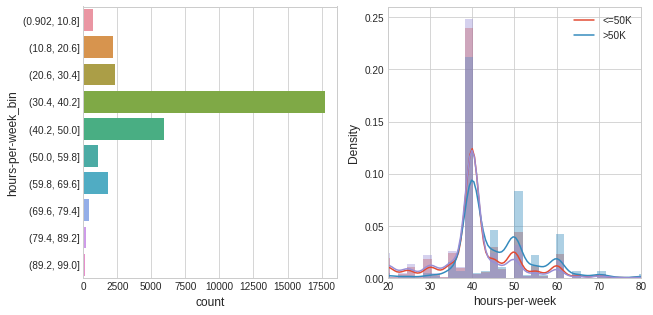

In [640]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=census_df);
plt.subplot(1, 2, 2)
sns.distplot(census_df['hours-per-week']);
sns.distplot(census_df[census_df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(census_df[census_df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 80)
plt.legend(loc='upper right', labels=['<=50K', '>50K'])

In [641]:
census_df['age-hours'] = census_df['age']*census_df['hours-per-week']
census_df['age-hours_bin'] = pd.cut(census_df['age-hours'], 10)

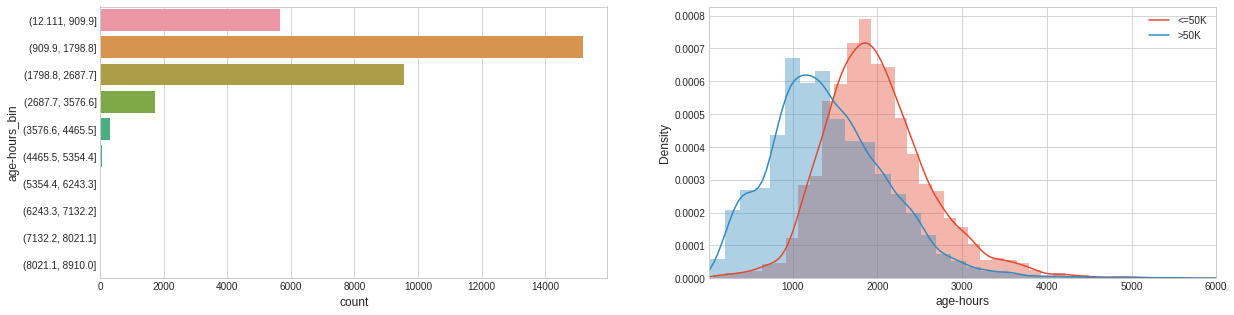

In [642]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=census_df)
plt.subplot(1, 2, 2)
sns.distplot(census_df[census_df['income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(census_df[census_df['income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(10, 6000)
plt.legend(loc='upper right', labels=['<=50K', '>50K'])

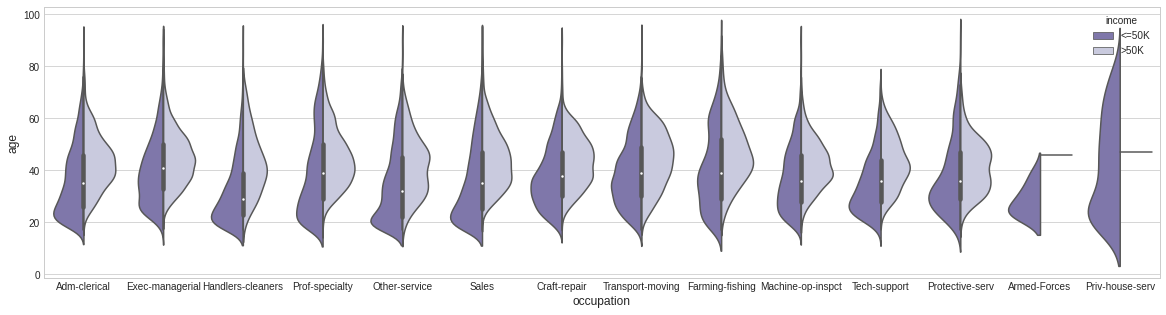

In [643]:
plt.figure(figsize=(20, 5))
vp = sns.violinplot(x="occupation", y="age", hue="income",
                    data=census_df, gridsize=100, palette="Purples_r", split=True, saturation=0.75)

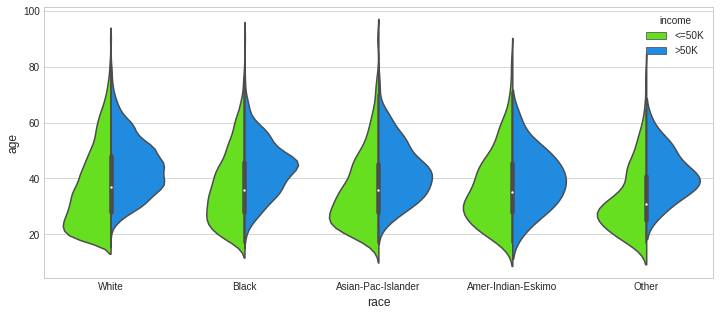

In [644]:
plt.figure(figsize=(12, 5))
vp = sns.violinplot(x="race", y="age", hue="income",
                    data=census_df, gridsize=50, palette="gist_rainbow", split=True)

In [645]:
census_df['income']=census_df['income'].map({'<=50K': 0, '>50K': 1})


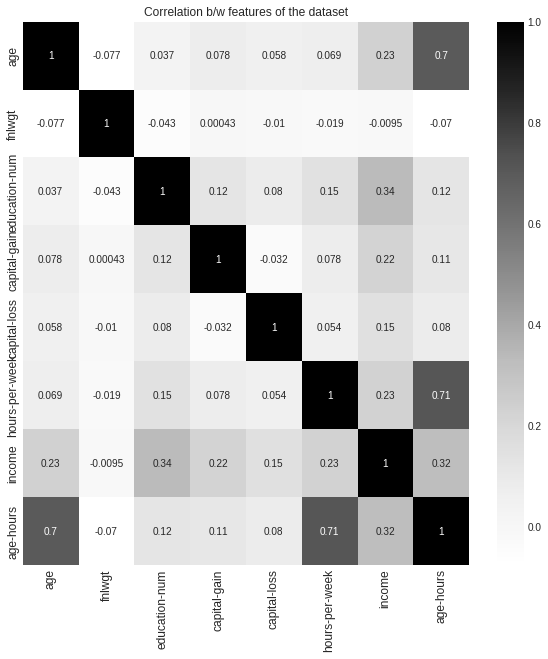

In [646]:
plt.figure(figsize = (10,10))
plt.title("Correlation b/w features of the dataset", fontsize = 12)
sns.heatmap(census_df.corr(), cmap = 'Greys', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

The majority of the attributes have a positive correlation with the Income variable.

In [647]:
census_df.drop(['education-num'], axis = 1, inplace = True)
#census_df.drop(['fnlwgt'], axis = 1, inplace = True)
census_df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [648]:
census_df.drop('AgeGroup', inplace = True, axis = 1)
census_df.drop('hours-per-week_bin', inplace = True, axis = 1)
census_df.drop('age-hours', inplace = True, axis = 1)
census_df.drop('age-hours_bin', inplace = True, axis = 1)

In [649]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


## Feature Encoding

In [650]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

categorical_values = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for column in categorical_values:
    label_encoder.fit(census_df[column])
    census_df[column] = label_encoder.transform(census_df[column])
    
from sklearn.model_selection import train_test_split
x = census_df.drop(['income'], axis=1)
y = census_df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

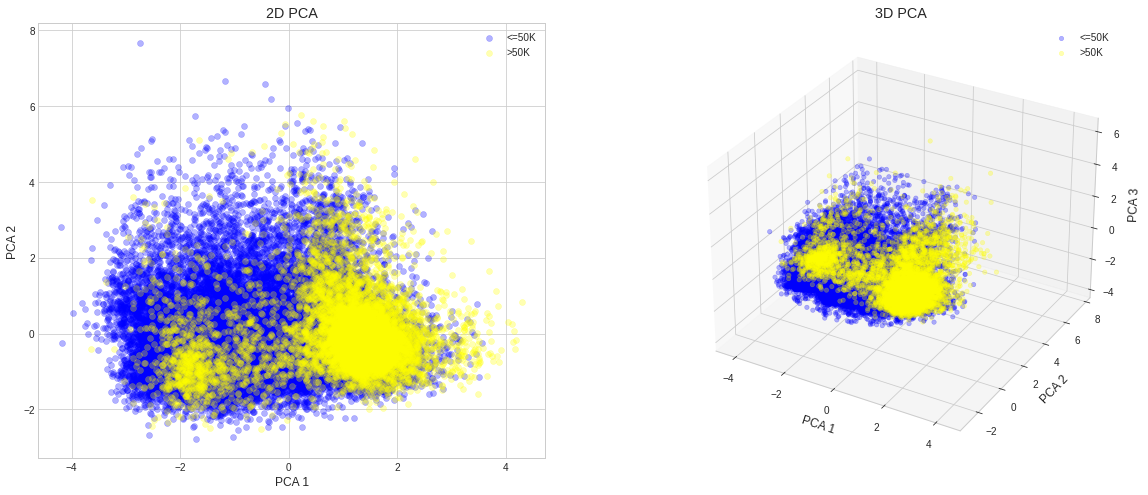

In [651]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate the features from the target variable
x = census_df.drop('income', axis=1)
y = census_df['income']

# Apply standard scaling to the features
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

# Apply PCA with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_std)

# Apply PCA with 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_std)

# Plot the results in 2D and 3D
fig = plt.figure(figsize=(20, 8))

# Plot 2D PCA
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_pca2[y == 0, 0], X_pca2[y == 0, 1], color='blue', alpha=0.3, label='<=50K')
ax1.scatter(X_pca2[y == 1, 0], X_pca2[y == 1, 1], color='yellow', alpha=0.3, label='>50K')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('2D PCA')
ax1.legend()

# Plot 3D PCA
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_pca3[y == 0, 0], X_pca3[y == 0, 1], X_pca3[y == 0, 2], color='blue', alpha=0.3, label='<=50K')
ax2.scatter(X_pca3[y == 1, 0], X_pca3[y == 1, 1], X_pca3[y == 1, 2], color='yellow', alpha=0.3, label='>50K')
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_zlabel('PCA 3')
ax2.set_title('3D PCA')
ax2.legend()

plt.show()

In [652]:
sc = StandardScaler()
X_train_std = sc.fit_transform(x_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.15579185, 0.24432524, 0.3260462 , 0.40616176, 0.48605013,
       0.56275794, 0.63647045, 0.7092286 , 0.77893685, 0.8469842 ,
       0.91384403, 0.96993925, 1.        ])

In [653]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 13) (9769, 13) (22792,) (9769,)


# KNN (K-Nearest Neighbors Algorithm) From Scratch

In [654]:
from tqdm import tqdm
from collections import Counter

class KNN_Classifier:
    def __init__(self, x_train, y_train, x_test, y_test) -> None:
      self.x_train = np.array(x_train)
      self.y_train = np.array(y_train)
      self.x_test = np.array(x_test)
      self.y_test = np.array(y_test)

    def KNNClassifier(self, k):
        train_data = self.x_train    
        self.y_pred = []
        append_y = self.y_pred.append
        bin_count = np.bincount
    
        for testData in tqdm(self.x_test):
            diff = train_data - testData #this method computes the distance between the test data point and all training data points using the Euclidean distance
            diff **= 2
            distances_arr = diff.sum(axis = 1)
            top_index = np.argpartition(distances_arr, k)[:k]
            top_labels = self.y_train[top_index]
            most_common_label = Counter(top_labels).most_common(1)[0][0]
            append_y(most_common_label)

    def score(self):
      self.accuracy = (np.array(self.y_pred) == np.array(self.y_test)).sum() / len(self.y_pred)
      self.precision = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_pred)
      self.recall = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_test)
      self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

      print('Accuracy = {}.'.format(self.accuracy))
      print('Precision = {}.'.format(self.precision))
      print('Recall = {}.'.format(self.recall))
      print('F1 Score = {}'.format(self.F1_score))

  

In [655]:
knn = KNN_Classifier(x_train, y_train, x_test, y_test)
knn1 = KNN_Classifier(x_train, y_train, x_test, y_test)

In [656]:
knn.KNNClassifier(4) 
knn1.KNNClassifier(5) 


100%|██████████| 9769/9769 [00:10<00:00, 933.57it/s]


In [657]:
knn.score()
print('')
knn1.score()

Accuracy = 0.758010031733033.
Precision = 0.5134649910233393.
Recall = 0.3561643835616438.
F1 Score = 0.4205882352941176

Accuracy = 0.7745931006244242.
Precision = 0.5794320798158097.
Recall = 0.31340805313408054.
F1 Score = 0.40678879310344823


# KNN Using Scikit Learn

In [658]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier() #default k = 5
knn.fit(x_train, y_train)
score_knn = knn.score(x_test,y_test)
print('The accuracy of the KNN Model is',score_knn) #compared to from scratch model with k = 5, the accuracy is quite similar

The accuracy of the KNN Model is 0.7746954652472106


# Logistic Regression From Scratch

In [659]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z)) #to convert the output of the model to a probability value between 0 and 1

In [660]:
def loss_func(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [661]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [662]:
def LogLikelihood(x, y, weights):   #MLE (Maximum Likelihood Estimation) is a method for estimating parameters
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [663]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [664]:
num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Logistic Regression using Gradient descent")
print("Learning rate: {}\nNumber of Iterations: {}".format(0.1, num_iter))

Logistic Regression using Gradient descent
Learning rate: 0.1
Number of Iterations: 100000


In [665]:
result = sigmoid(x, theta)

In [666]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy for Loss minimization:")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy for Loss minimization:


24.080955744602438

In [667]:
num_iter = 100000
x2 = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Logistic Regression using MLE")
print("Learning rate: {}\nNumber of Iterations: {}".format(0.1, num_iter))

Logistic Regression using MLE
Learning rate: 0.1
Number of Iterations: 100000


In [668]:
result2 = sigmoid(x2, theta2)
print("Accuracy for Maximum Likelihood Estimation:")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy for Maximum Likelihood Estimation:


78.94720678111852

In [669]:
np.save('theta.npy', theta2) ## learned theta parameters

# Logistic Regression Using Scikit Learn

In [670]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = census_df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [671]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8048930289691882


In [672]:
X = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
Y = census_df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8088438507600184
2 0.8010133578995855
3 0.7999385843697221
4 0.8060801473975127
5 0.8019345923537541
6 0.8079226163058498
7 0.8025487486565331
8 0.8050053738676494
9 0.8099186242898818
10 0.7971748810072163
11 0.8076155381544603
12 0.8016275142023646
13 0.8048518347919545
14 0.8096115461384923
15 0.8046982957162598
16 0.8070013818516812
17 0.8008598188238907
18 0.8068478427759865
19 0.805926608321818
20 0.8014739751266697
21 0.8014739751266697
22 0.7996315062183326
23 0.7985567326884692
24 0.798710271764164


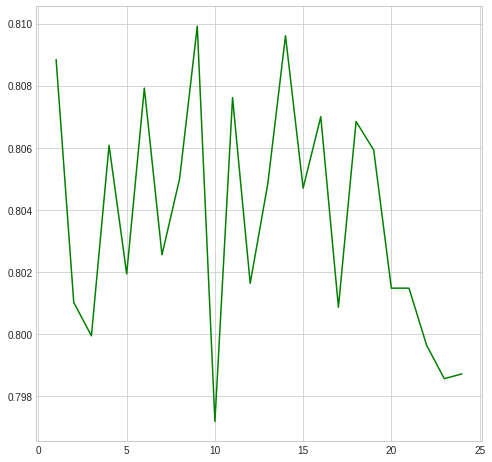

In [673]:
plt.figure(figsize=(8,8))
plt.plot(rs, acc, color ='green')

for i in range(len(rs)):
    print(rs[i],acc[i]) 

In [674]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   marital-status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   sex             32561 non-null  int64
 9   capital-gain    32561 non-null  int64
 10  capital-loss    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  native-country  32561 non-null  int64
 13  income          32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


# Applying the Logistic Regression model on Test Data (adult.test)

In [675]:
# Load the test data
#test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)

test_data = pd.read_csv('adult.test.csv')

# Preprocess the test data
attrib, counts = np.unique(test_data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_data['workclass'][test_data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(test_data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_data['occupation'][test_data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(test_data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
test_data['native-country'][test_data['native-country'] == '?'] = most_freq_attrib 
#test_data = test_data.reset_index(drop=True)
test_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

test_data['income'] = test_data['income'].apply(lambda x: 1 if '>50K' in x else 0)

test_data.drop(['education-num'], axis = 1, inplace = True)
#test_data.drop(['fnlwgt'], axis = 1, inplace = True)

categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(test_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

# Extract the features from the test data
X_test = test_data.values
# Load the learned theta parameters
theta = np.load('theta.npy')

# Make predictions on the test data
def predict(theta, X):
    # Compute the dot product between X and theta
    dot_product = np.dot(X, theta)
    
    # Apply the sigmoid function to the dot product
    y_pred = 1 / (1 + np.exp(-dot_product))
    
    # Round the predicted probabilities to 0 or 1
    y_pred_rounded = np.round(y_pred)
    
    return y_pred_rounded.astype(int)

y_pred = predict(theta, X_test)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(y_pred).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100


Accuracy (Maximum Likelihood Estimation):


74.94625637245869